<a href="https://colab.research.google.com/github/Mothxxx/Ai-model/blob/main/first_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from shlex import split
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras


import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax, Flatten, Dropout

In [ ]:
train_ds, test_ds = tfds.load(
    'mnist' ,
    split = ['train', 'test'],
    #dati separati tra feature e target
    as_supervised=True,
    #dimensione gruppo dato
    batch_size= 8,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

28*28 sono i pixel dell'immagine.
1 è per l'array
dtype=tf.int64, è una classe che definisce gli interi da 0 a 9.

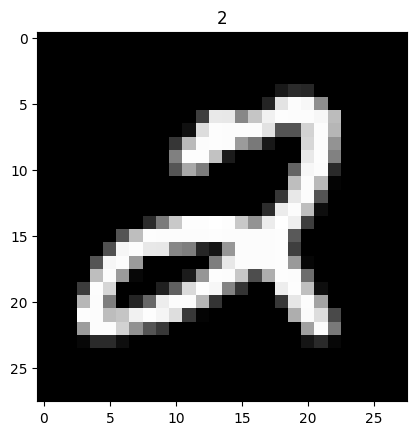

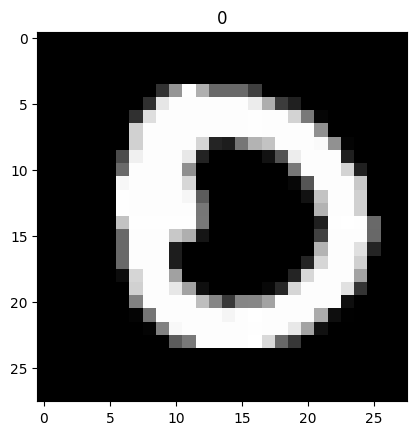

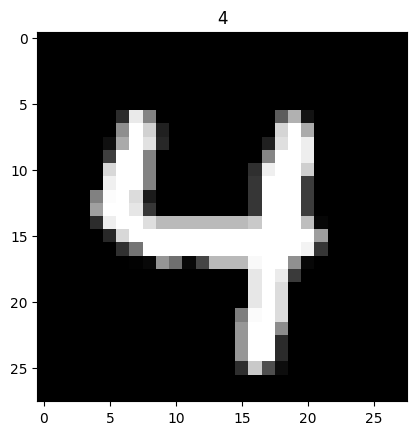

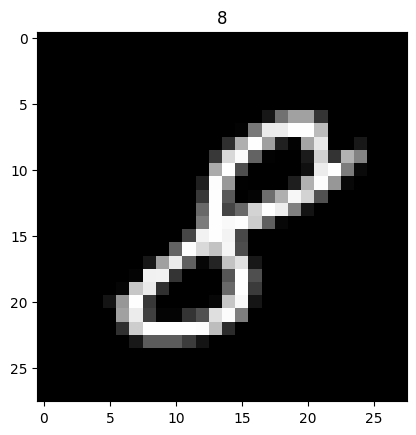

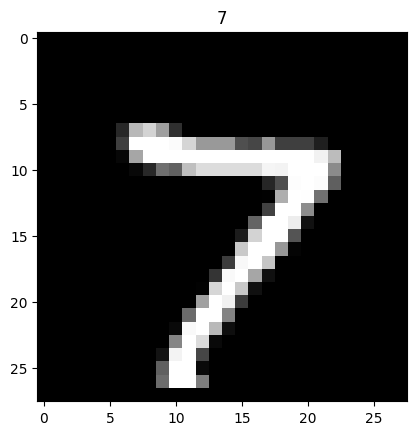

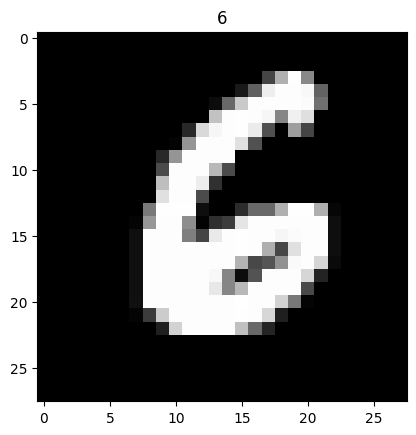

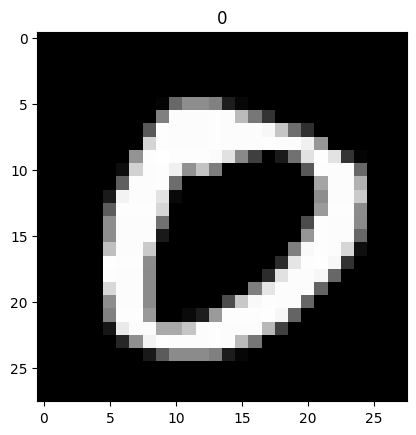

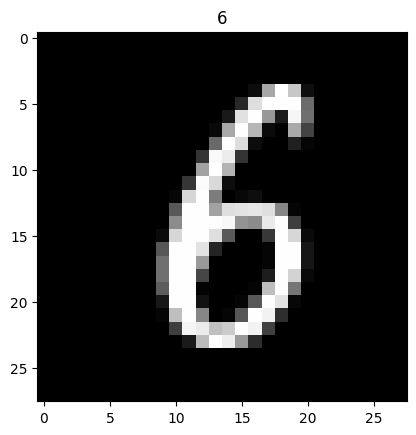

In [ ]:
for batch_images, batch_labels in test_ds.take(1): # prendi un batch dal dataset di test.
 for i, _ in enumerate(batch_images):
  image = batch_images[i] # singola immagine
  label = batch_labels[i] # singola label
  # print(image.numpy().squeeze(),label)
  plt.imshow(image.numpy().squeeze(), cmap='gray' )
  plt.title(label.numpy())
  plt.show()


tf.Tensor(2, shape=(), dtype=int64) : categoria a cui appartiene l' immagine
2 scalare: ID di categoria (classificatore)


In [ ]:
#TODO : scale data scala i valori delle feature (pixel tra 0 e 1 ,0 e -1...)

In [ ]:
num_classes = 10

In [ ]:
# chiamo il cotsruttiore
model = Sequential([
      Flatten(input_shape=(28, 28, 1)),
      Dense(100, activation='relu'),
      Dropout(0.5),
      Dense(num_classes, activation= 'softmax'),

])

 # spegne il50% dei neuroni per imparare codifiche distribuite e fa si non che impari a riconsicre singoli record specializzando i singioli neuroni della rete su specifici records

In [ ]:
model.compile(
  loss= 'sparse_categorical_crossentropy', # misura di errore usate per i classificatori
  metrics = 'accuracy' # % di risposte corrette
 )

In [ ]:
model.summary()


20 in più sono i bias

In [ ]:
report = model.fit(train_ds, epochs=10)

Epoch 1/10
7500/7500 [==============================] - 24s 3ms/step - loss: 2.6788 - accuracy: 0.6072
Epoch 2/10
7500/7500 [==============================] - 16s 2ms/step - loss: 1.6351 - accuracy: 0.6980
Epoch 3/10
7500/7500 [==============================] - 17s 2ms/step - loss: 1.5876 - accuracy: 0.7246
Epoch 4/10
7500/7500 [==============================] - 27s 4ms/step - loss: 1.5424 - accuracy: 0.7341
Epoch 5/10
7500/7500 [==============================] - 17s 2ms/step - loss: 1.5176 - accuracy: 0.7449
Epoch 6/10
7500/7500 [==============================] - 16s 2ms/step - loss: 1.4807 - accuracy: 0.7505
Epoch 7/10
7500/7500 [==============================] - 23s 3ms/step - loss: 1.4679 - accuracy: 0.7570
Epoch 8/10
7500/7500 [==============================] - 19s 3ms/step - loss: 1.4789 - accuracy: 0.7581
Epoch 9/10
1851/7500 [======>.......................] - ETA: 14s - loss: 1.4242 - accuracy: 0.7614

<Axes: >

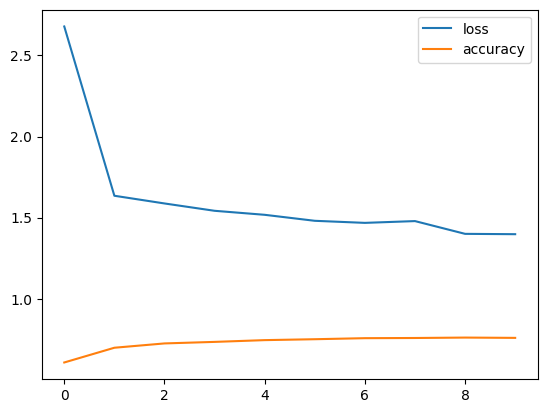

In [24]:
pd.DataFrame(report.history).plot()

In [ ]:
model.evaluate(test_ds)

In [ ]:
preds= model.predict(test_ds)

In [ ]:
preds[12]

In [ ]:
np.argmax(preds, axis =1)

In [ ]:
x_new =np.random.random([1, 28, 28, 1])* 256
x_new

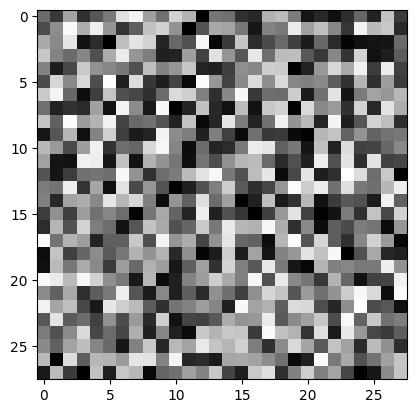

In [51]:
plt.imshow(x_new[0].squeeze(), cmap='gray')

In [52]:
np.argmax(model.predict(x_new), axis =1)

1/1 [==============================] - 0s 20ms/step


array([8])

In [53]:
def load_image(file_name):
  raw = tf.io.read_file(file_name)
  tensor = tf.io.decode_image(raw)
  return tensor

load_image('image_5.png').shape

TensorShape([28, 28, 1])

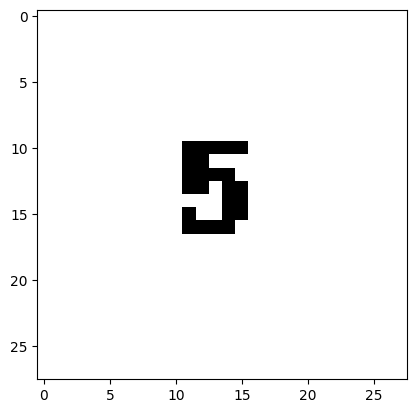

In [54]:
my_image = load_image('image_5.png')
plt.imshow(my_image.numpy().squeeze(), cmap='gray')


In [62]:
# metto l imagine nel batch

my_batch = tf.expand_dims(my_image, 0)

TensorShape([1, 28, 28, 1])

In [56]:
probs = model.predict(my_batch)

1/1 [==============================] - 0s 19ms/step


In [57]:
np.argmax(probs[0])

8